In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import datetime as dt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
word_not_include = ['india', 'indian', 'national', 'modi', 'international', 'speech', 'speeches']

In [5]:
data_without_hindi = pd.read_csv('speech_without_hindi.csv')
data_with_hindi = pd.read_csv('speech_with_hindi.csv')

In [6]:
data_with_hindi.head(10)

headings  ...                                               tags
0  PM’s Opening Remarks during Interaction with C...  ...  Good Governance, Novel Coronavirus, COVID-19 E...
1  We've to take Indian economy out of 'command a...  ...  Aatma Nirbhar Bharat Abhiyan, Development, Man...
2  India is committed to strengthening ties with ...  ...  Scott Morrison, Bilateral Meeting, Meeting, In...
3  India will definitely get its growth back: PM ...  ...  CII, Celebration, Novel Coronavirus, Health, H...
4  At the root of India’s brave fight against COV...  ...  Education, Youth, Yuva Shakti, Technology, Nov...
5  The fight against Coronavirus is being fought ...  ...  Good Governance, Mann Ki Baat, Novel Coronavir...
6  Let us resolve to make India self-reliant: PM ...  ...  Lockdown, Social Distancing, Novel Coronavirus...
7  Buddha is an example that strong will-power ca...  ...  BuddhaPurnima, Buddha Purnima, International V...
8  Intervention by the Prime Minister at Video Co...  ...  Novel Coronavirus, Video Conference, Yoga, Int...
9  To become self-reliant and self-sufficient is ...  ...  Sarpanches, Meeting, Video Conference, Panchay...

[10 rows x 4 columns]

In [7]:
data_without_hindi.head(10)

headings  ...                                               tags
0  PM’s Opening Remarks during Interaction with C...  ...  Good Governance, Novel Coronavirus, COVID-19 E...
1  We've to take Indian economy out of 'command a...  ...  Aatma Nirbhar Bharat Abhiyan, Development, Man...
2  India is committed to strengthening ties with ...  ...  Scott Morrison, Bilateral Meeting, Meeting, In...
3  India will definitely get its growth back: PM ...  ...  CII, Celebration, Novel Coronavirus, Health, H...
4  At the root of India’s brave fight against COV...  ...  Education, Youth, Yuva Shakti, Technology, Nov...
5  The fight against Coronavirus is being fought ...  ...  Good Governance, Mann Ki Baat, Novel Coronavir...
6  Let us resolve to make India self-reliant: PM ...  ...  Lockdown, Social Distancing, Novel Coronavirus...
7  Buddha is an example that strong will-power ca...  ...  BuddhaPurnima, Buddha Purnima, International V...
8  Intervention by the Prime Minister at Video Co...  ...  Novel Coronavirus, Video Conference, Yoga, Int...
9  Lockdown in India will be extended till 3rd Ma...  ...  Novel Coronavirus, Human Development, Health, ...

[10 rows x 4 columns]

In [8]:
print('--------Data With Out Hindi--------')

print('Heading: ', data_without_hindi['headings'][0])
print('Article: ', data_without_hindi['articles'][0])
print('Tags: ', data_without_hindi['tags'][0])

print('--------Data With Hindi--------')

print('Heading: ', data_with_hindi['headings'][9])
print('Article: ', data_with_hindi['articles'][9])
print('Tags: ', data_with_hindi['tags'][9])


--------Data With Out Hindi--------
Heading:  PM’s Opening Remarks during Interaction with Chief Ministers on Covid-19
Article:  Namaskar friends! It has been two weeks since the Unlock-One. It is necessary to review the issues and the experiences that have come in the forefront during this period. In today's discussion, I will get the opportunity to learn and understand a lot from you. The salient points that will come out of today's discussion and your suggestions will help the country to plan ahead. Friends, Timing plays a very crucial role in dealing with any crisis. Decisions taken at the right time have immensely helped in controlling the spread of coronavirus pandemic in the country. Whenever India's fight against Coronavirus will be studied in the future, this period will be remembered for the way in which we all have worked together during this time and how the best example of Cooperative Federalism was set. Friends, When Coronavirus was not even a topic for discussion in seve

In [9]:
data_with_hindi['dates'] = pd.to_datetime(data_with_hindi['dates'])
data_without_hindi['dates'] = pd.to_datetime(data_without_hindi['dates'])

In [10]:
data_with_hindi.head()

headings  ...                                               tags
0  PM’s Opening Remarks during Interaction with C...  ...  Good Governance, Novel Coronavirus, COVID-19 E...
1  We've to take Indian economy out of 'command a...  ...  Aatma Nirbhar Bharat Abhiyan, Development, Man...
2  India is committed to strengthening ties with ...  ...  Scott Morrison, Bilateral Meeting, Meeting, In...
3  India will definitely get its growth back: PM ...  ...  CII, Celebration, Novel Coronavirus, Health, H...
4  At the root of India’s brave fight against COV...  ...  Education, Youth, Yuva Shakti, Technology, Nov...

[5 rows x 4 columns]

In [11]:
data_with_hindi.sort_values(by='dates', inplace=True)
data_without_hindi.sort_values(by='dates', inplace=True)

In [12]:
data_with_hindi.reset_index(inplace=True, drop=True)
data_without_hindi.reset_index(inplace=True, drop=True)

In [13]:
print('Data with hindi shape: ', data_with_hindi.shape)
print('Data with out hindi shape: ', data_without_hindi.shape)

Data with hindi shape:  (960, 4)
Data with out hindi shape:  (870, 4)


In [14]:
count_by_year_hindi = Counter([date.year for date in data_with_hindi['dates']])
count_by_year = Counter([date.year for date in data_without_hindi['dates']])

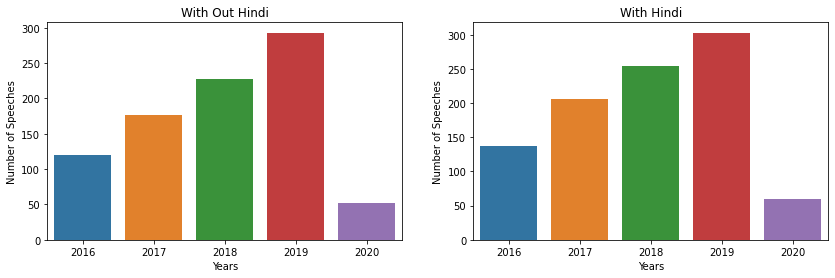

In [15]:
def plot_value(di, i, j, k, title, re=False):
    plt.subplot(i, j, k)
    keys = di.keys()
    values = di.values()
    if re:
        plot = sns.barplot(list(keys), list(values))
        plot.set_title(title)
        return plot
    else:
        sns.barplot(list(keys), list(values)).set_title(title)
plt.figure(figsize=(14, 4))
plot_value(count_by_year, 1, 2, 1, 'With Out Hindi')
plt.xlabel("Years")
plt.ylabel("Number of Speeches")
plot_value(count_by_year_hindi, 1, 2, 2, 'With Hindi')
plt.xlabel("Years")
plt.ylabel("Number of Speeches")
plt.show()

In [16]:
data_with_hindi.isnull().sum()
data_without_hindi.isnull().sum()
data_with_hindi.dropna(inplace=True)

In [17]:
def get_words_tags(df):
    tag_list = []
    i = 0
    for tag in data_with_hindi['tags']:
        for t in tag.split(','):
            tag_list.append(t)
    tags_counter = Counter(tag_list)
    return tags_counter

In [18]:
total_words = np.array(get_words_tags(data_with_hindi).most_common(30))[:, 0]

In [19]:
def generate_word_cloud(words):
    text = ' '.join(total_words)
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

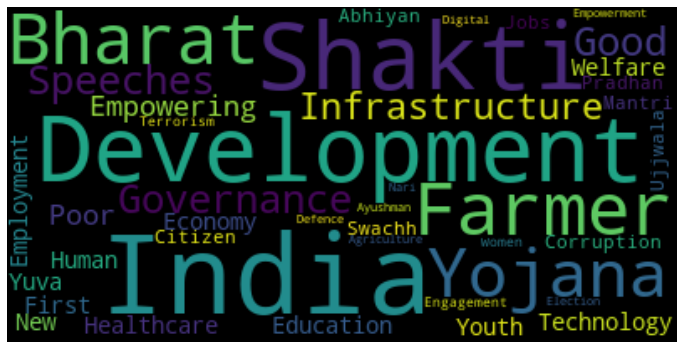

In [20]:
generate_word_cloud(total_words)

In [21]:
international_speech_hindi = data_with_hindi[data_with_hindi['tags'].str.contains('Modi in')]
speech_hindi = data_with_hindi[~data_with_hindi['tags'].str.contains('Modi in')]
speech = data_without_hindi[~data_without_hindi['tags'].str.contains('Modi in')]

In [22]:
data_2016 = speech_hindi[speech_hindi['dates'].dt.year == 2016]
data_2016_hindi = data_with_hindi[data_with_hindi['dates'].dt.year == 2016]
data_2017 = speech_hindi[speech_hindi['dates'].dt.year == 2017]
data_2017_hindi = data_with_hindi[data_with_hindi['dates'].dt.year == 2017]
data_2018 = speech_hindi[speech_hindi['dates'].dt.year == 2018]
data_2018_hindi = data_with_hindi[data_with_hindi['dates'].dt.year == 2018]
data_2019 = speech_hindi[speech_hindi['dates'].dt.year == 2019]
data_2019_hindi = data_with_hindi[data_with_hindi['dates'].dt.year == 2019]
data_2020 = speech_hindi[speech_hindi['dates'].dt.year == 2020]
data_2020_hindi = data_with_hindi[data_with_hindi['dates'].dt.year == 2020]
mann_ki_baat_hindi = data_with_hindi[data_with_hindi['tags'].str.contains('Mann')]
mann_ki_baat = data_without_hindi[data_without_hindi['tags'].str.contains('Mann')]

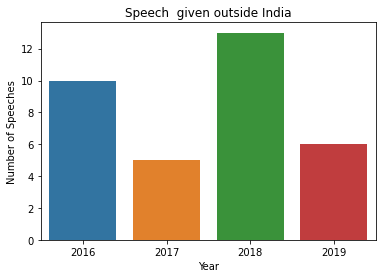

In [23]:
international_counter = Counter([date.year for date in international_speech_hindi['dates']])

plot_value(international_counter, 1, 1, 1, 'Speech  given outside India')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

In [24]:
def get_countries(df):
    tags = df['tags'].apply(lambda x : x.split(','))
    tags = tags.values
    tag = []
    for i in tags:
        for j in i:
            if 'Modi in' in j or 'Modi In' in j:
                tag.append(j[8:].strip())

    return set(tag), Counter(tag)

In [25]:
countries, countries_count = list(get_countries(international_speech_hindi))

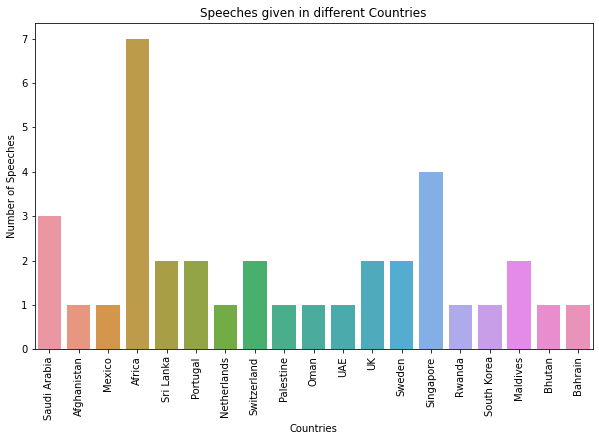

In [26]:
plt.figure(figsize=(10, 6))
plot = plot_value(countries_count, 1, 1, 1, 'Speeches given in different Countries', True)
plt.xlabel('Countries')
plt.ylabel('Number of Speeches')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

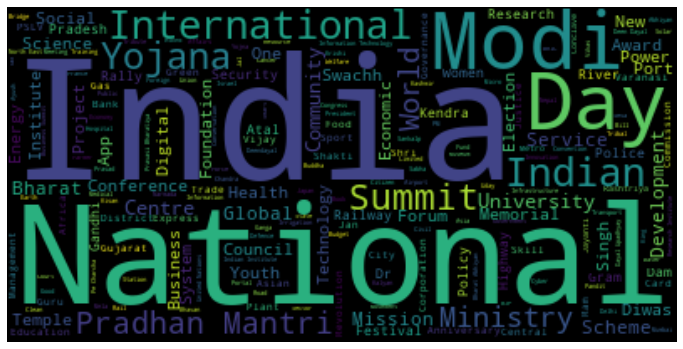

In [27]:
total_words = get_words_tags(international_speech_hindi)
generate_word_cloud(list(total_words.keys())[:30])

In [28]:
def get_words_speech(df):
    words = []
    stop_words = set(stopwords.words('english'))
    for line in df['articles']:
        if 'not found' in line:
            continue
        word_tokens = [word for word in line.split(' ') if word not in stop_words]
        words += word_tokens
    return Counter(words)

In [29]:
word_tokens = get_words_speech(international_speech_hindi)

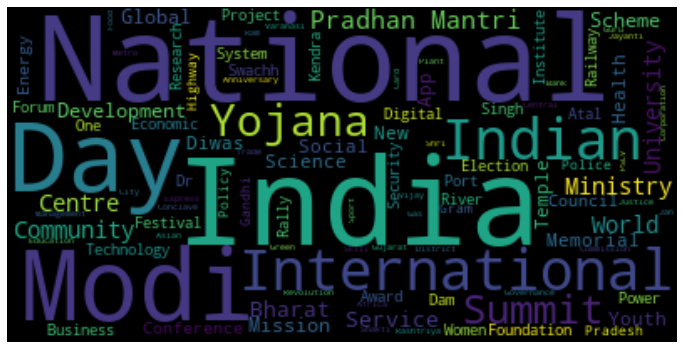

In [30]:
words = list(word_tokens.keys())
generate_word_cloud(words[:30])

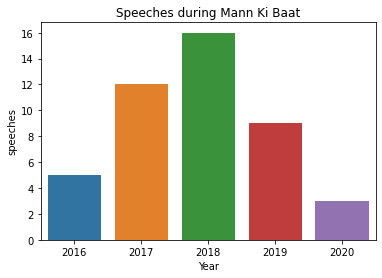

In [31]:
mann_ki_baat_counter = Counter(date.year for date in mann_ki_baat_hindi['dates'])
plot_value(mann_ki_baat_counter, 1, 1, 1, 'Speeches during Mann Ki Baat')
plt.xlabel('Year')
plt.ylabel('speeches')
plt.show()

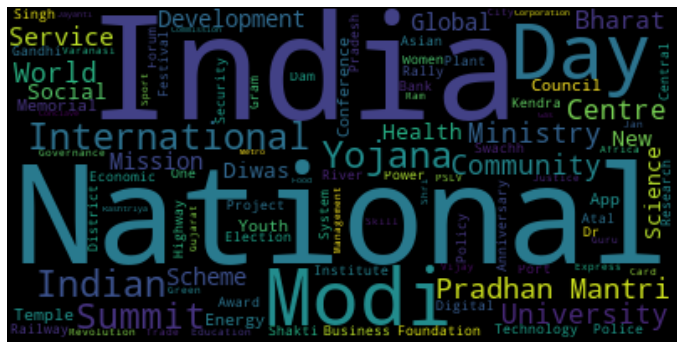

In [32]:
words = get_words_tags(mann_ki_baat_hindi)
generate_word_cloud(list(words.keys())[:30])

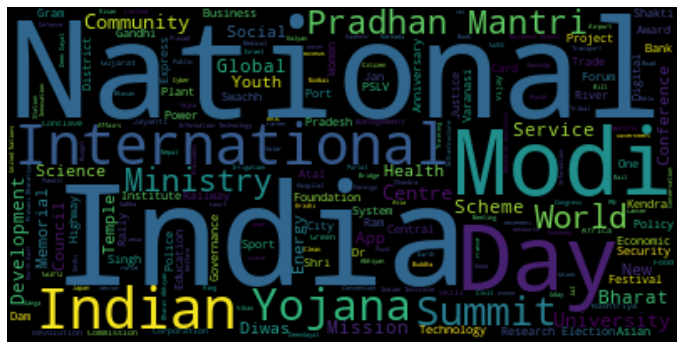

In [33]:
words = get_words_speech(mann_ki_baat_hindi)
generate_word_cloud(words)

In [34]:
def cloud_by_year(df, year):
    words = get_words_speech(df[df['dates'].dt.year==year])
    generate_word_cloud(list(words.keys())[:30])

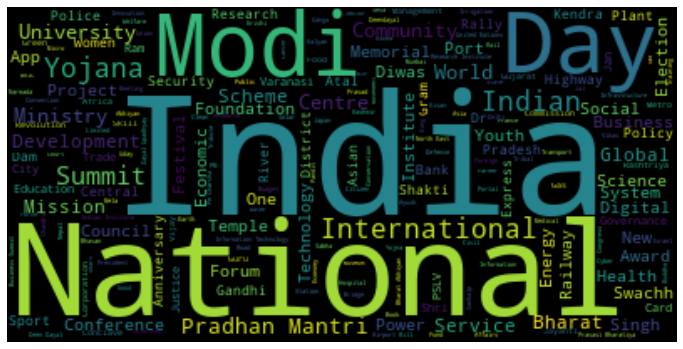

In [35]:
cloud_by_year(mann_ki_baat_hindi, 2016)

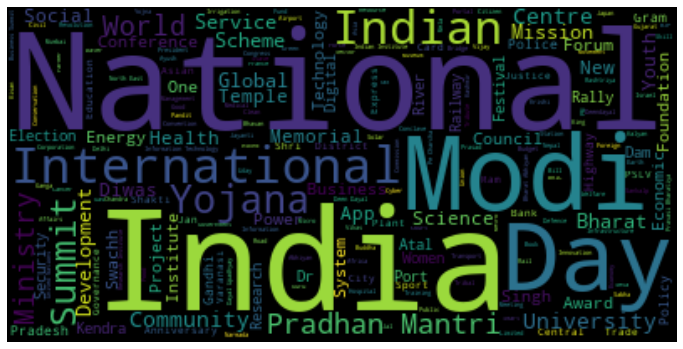

In [36]:
cloud_by_year(mann_ki_baat_hindi, 2017)

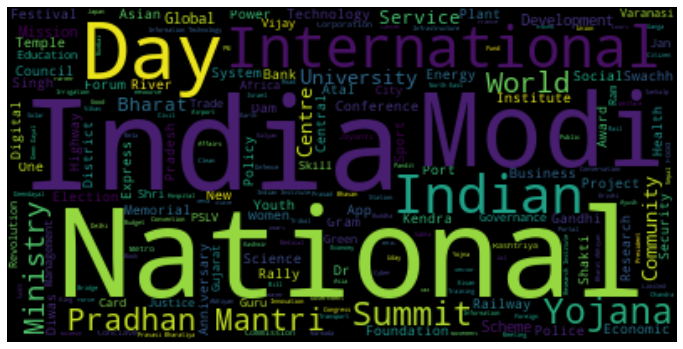

In [37]:
cloud_by_year(mann_ki_baat_hindi, 2018)

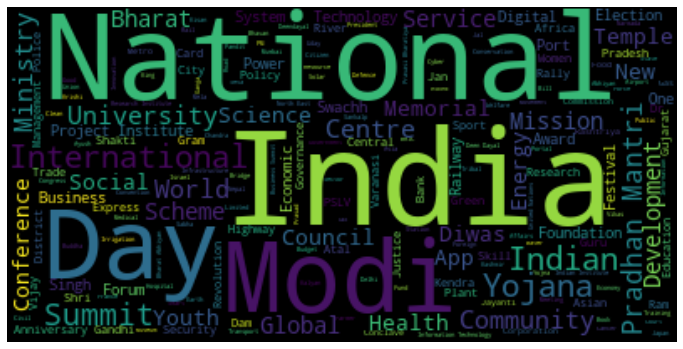

In [38]:
cloud_by_year(mann_ki_baat_hindi, 2019)

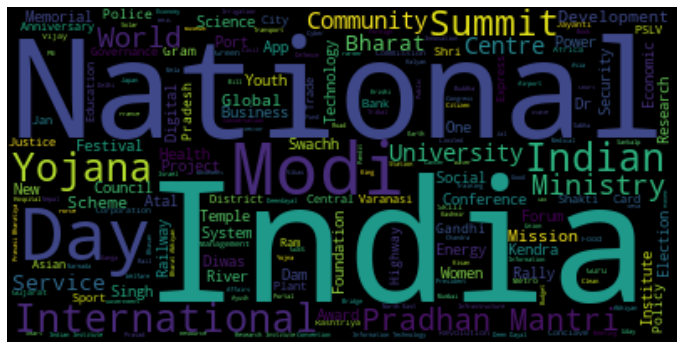

In [39]:
cloud_by_year(mann_ki_baat_hindi, 2020)

In [40]:
months_hindi = Counter([date.month for date in data_2016_hindi['dates']])
months = Counter([date.month for date in data_2016['dates']])

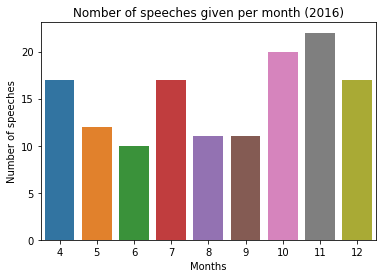

In [41]:
plot_value(months_hindi, 1, 1, 1, 'Nomber of speeches given per month (2016)')
plt.xlabel('Months')
plt.ylabel('Number of speeches')
plt.show()

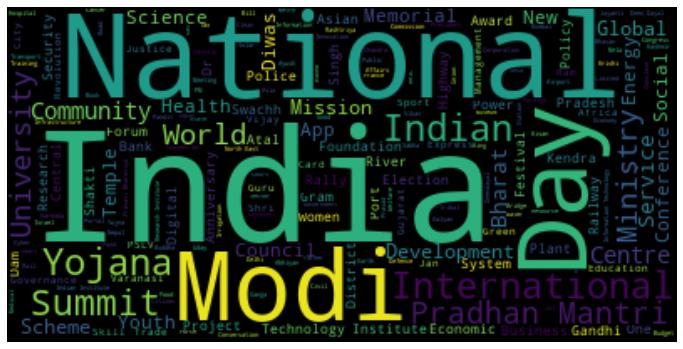

In [42]:
words = get_words_tags(data_2016_hindi)
generate_word_cloud(list(words.keys())[:30])

In [43]:
months_hindi = Counter([date.month for date in data_2017_hindi['dates']])

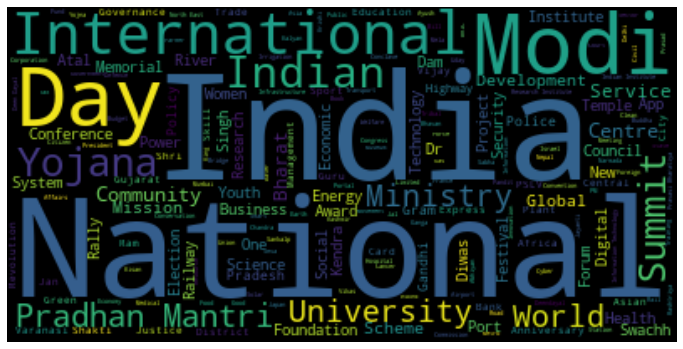

In [44]:
words = get_words_speech(data_2016_hindi)
generate_word_cloud(list(words.keys())[:30])

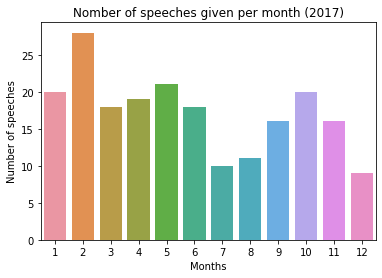

In [45]:
plot_value(months_hindi, 1, 1, 1, 'Nomber of speeches given per month (2017)')
plt.xlabel('Months')
plt.ylabel('Number of speeches')
plt.show()

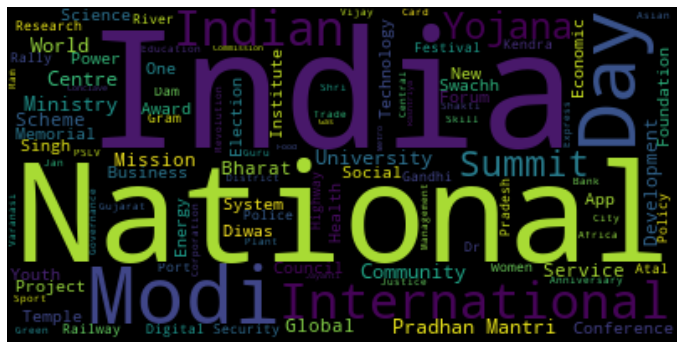

In [46]:
words = get_words_tags(data_2016_hindi)
generate_word_cloud(list(words.keys())[:30])

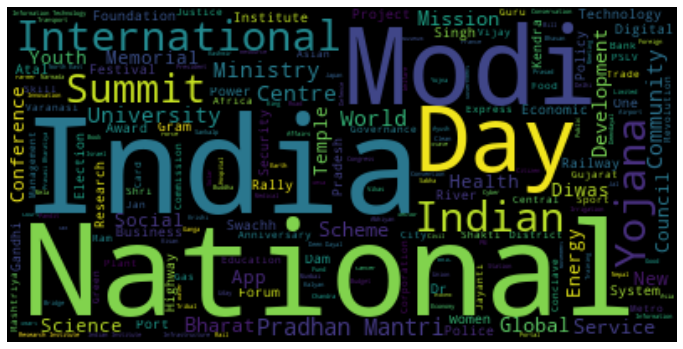

In [47]:
words = get_words_speech(data_2017_hindi)
generate_word_cloud(list(words.keys())[:30])

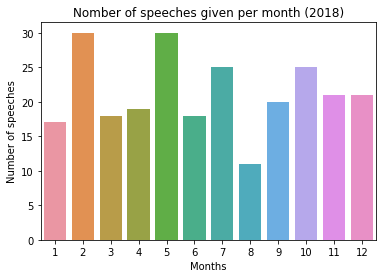

In [48]:
months_hindi = Counter([date.month for date in data_2018_hindi['dates']])
plot_value(months_hindi, 1, 1, 1, 'Nomber of speeches given per month (2018)')
plt.xlabel('Months')
plt.ylabel('Number of speeches')
plt.show()

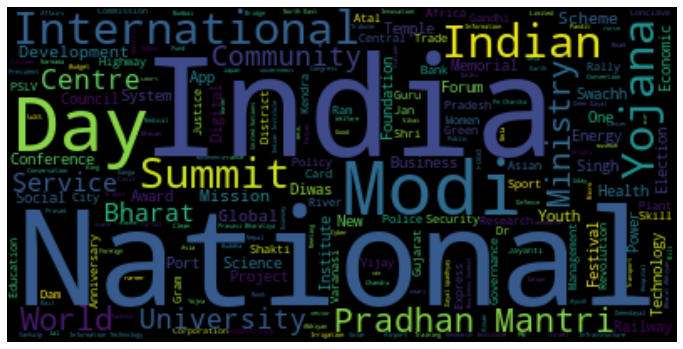

In [49]:
words = get_words_tags(data_2018_hindi)
generate_word_cloud(list(words.keys())[:30])

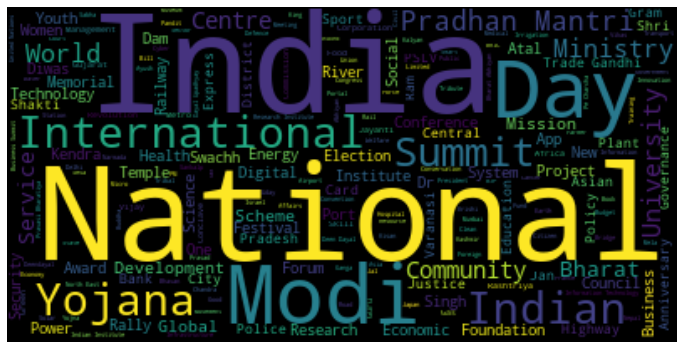

In [50]:
words = get_words_speech(data_2018_hindi)
generate_word_cloud(list(words.keys())[:30])

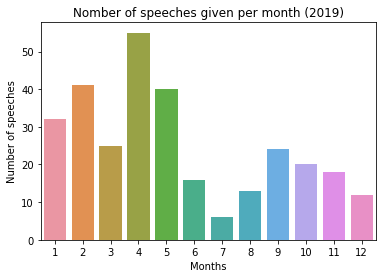

In [51]:
months_hindi = Counter([date.month for date in data_2019_hindi['dates']])
plot_value(months_hindi, 1, 1, 1, 'Nomber of speeches given per month (2019)')
plt.xlabel('Months')
plt.ylabel('Number of speeches')
plt.show()

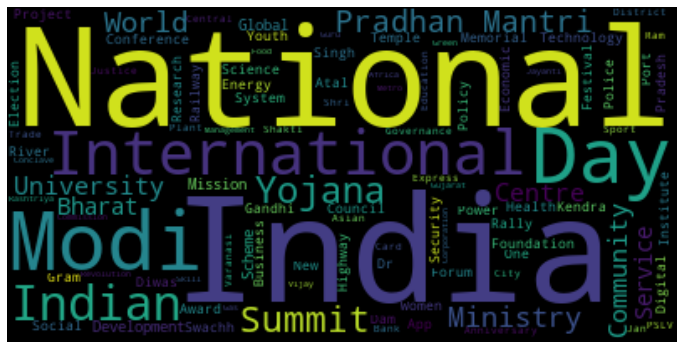

In [52]:
words = get_words_tags(data_2019_hindi)
generate_word_cloud(list(words.keys())[:30])

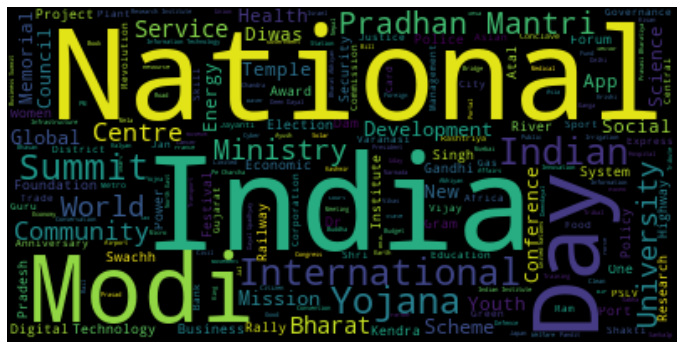

In [53]:
words = get_words_speech(data_2019_hindi)
generate_word_cloud(list(words.keys())[:30])

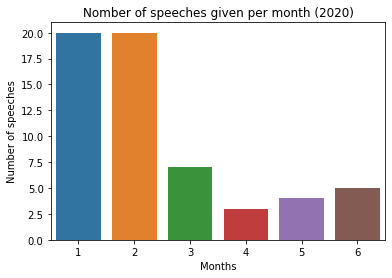

In [54]:
months_hindi = Counter([date.month for date in data_2020_hindi['dates']])
plot_value(months_hindi, 1, 1, 1, 'Nomber of speeches given per month (2020)')
plt.xlabel('Months')
plt.ylabel('Number of speeches')
plt.show()

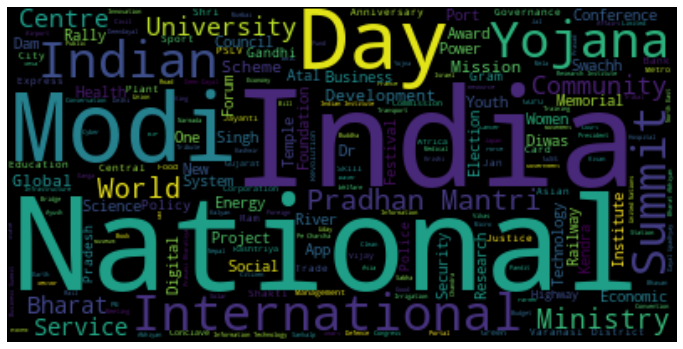

In [55]:
words = get_words_tags(data_2020_hindi)
generate_word_cloud(list(words.keys())[:30])

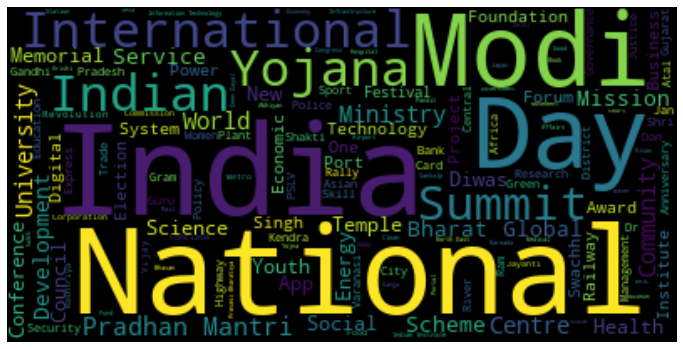

In [56]:
words = get_words_speech(data_2020_hindi)
generate_word_cloud(list(words.keys())[:30])